# Lab Assignment One: Exploring Table Data
Andrew Sneed

Tristan Knotts

Fernando Corral

Machine Learning - CSE 5324


## Imports

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Business Understanding



<p> This dataset, "winemag Data," consists of information from nearly 130,000 winemag.com wine reviews. In addition to the reviewers' description of and points awarded (out of 100) to each wine, the dataset also contains factual information on each wine, i.e., location information, designation, price, variety, title, and winery. The dataset was orginally scraped by Kaggle user Zack Thoutt (username: Zackthoutt). His desire was to utilize the data to "create a predictive model to identify wines through blind tasting like a master sommelier". 
    
Our prediction task would be to estimate the points a reviewer would award a particular wine, given only its factual characteristics. Those who read product reviews fall into two categories: Some read the full review, and some focus solely on the rating. Because many readers care only, or mostly, about the rating, winemag.com is incentivized to be sure that reviewers are practicing original thought when rating the wine. For instance, a strong correlation between points awarded and wine price would make these ratings far less useful to readers. An algorithm that could accurately predict what score a given reviewer will award each wine could serve as an accountability check for reviewers to serve their readers by practicing original thought. Other publications that emphasize ratings, like Pitchfork, may also be interested in this algorithm to hold their reviewers accountable.

A more ethically troubling endgame for this prediction task would be to replace reviewers with algorithms. </p>

===================================================================================

Dataset: Human Resources Analytics URL: https://www.kaggle.com/zynicide/wine-reviews

## 2. Data Understanding

### 2.1 Data Description

In [12]:
df = pd.read_csv('./wine-reviews/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
print("Number of provinces:",len(df.province.unique()))
print("Number of countries:",len(df.country.unique()))
print("Number of primary regions :",len(df.region_1.unique()))
print("Number of secondary regions :",len(df.region_2.unique()))
print("Number of wine varieties:",len(df.variety.unique()))
print("Number of wineries types:",len(df.winery.unique()))
print("Number of designations:",len(df.designation.unique()))

print("Number of reviewers:",len(df.taster_name.unique()))

Number of provinces: 426
Number of countries: 44
Number of primary regions : 1230
Number of secondary regions : 18
Number of wine varieties: 708
Number of wineries types: 16757
Number of designations: 37980
Number of reviewers: 20


### Category Analysis
In this report we will be utilizing the region categories: province, country, primary region, secondary region, wine variety, winery type, designations, and reviwers as the premise for predicting a wine reviewers rating of a specific wine.

## 3. Data Visualization

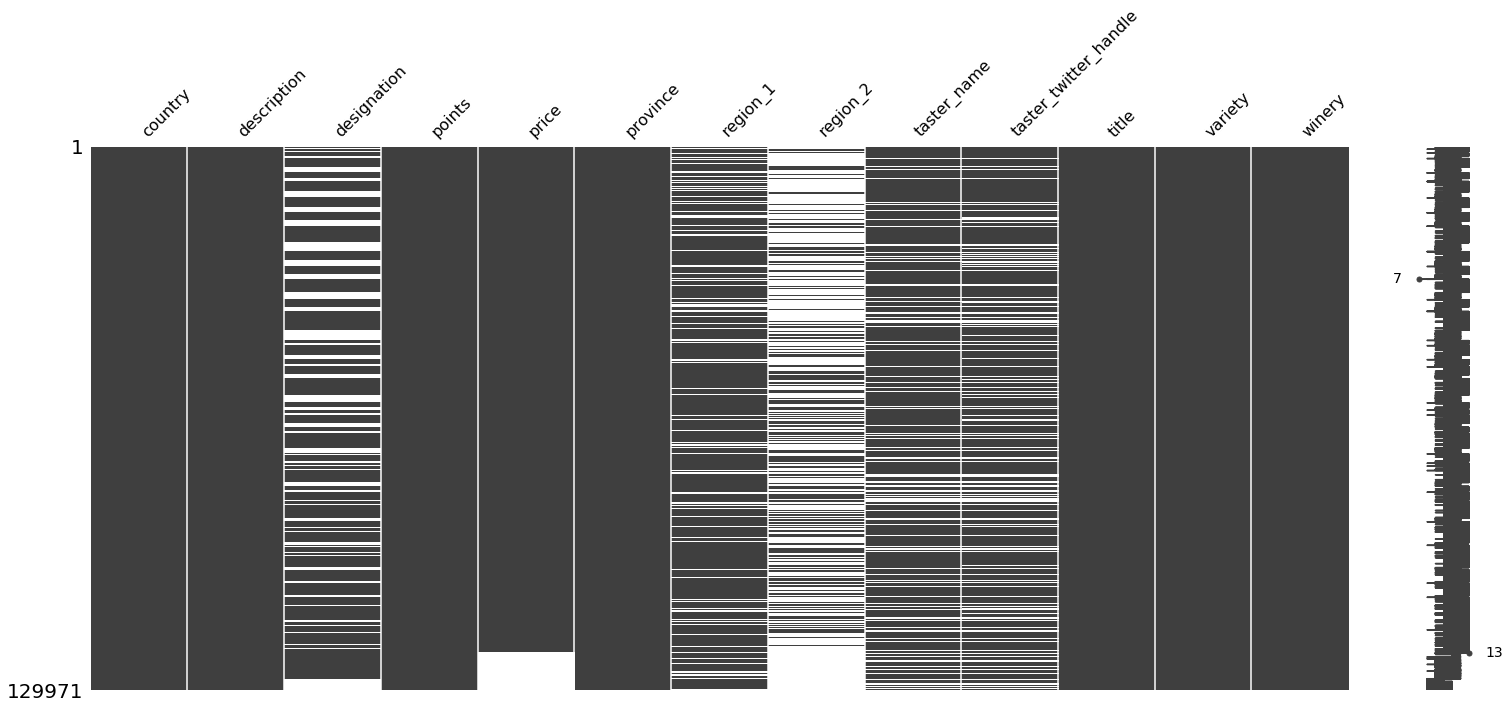

In [15]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=['price','designation','region_1','region_1','region_2','taster_twitter_handle']))

In [16]:
for col in ['description','region_2','taster_twitter_handle']:
    if col in df:
        del df[col]

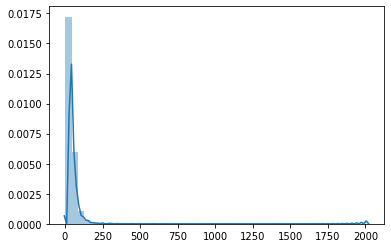

In [17]:
nona = df.dropna()
x = np.random.normal(nona['price'])
sns.distplot(x);

### Analysis of price vs rating comparison


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc urna est, ultrices nec varius eget, tincidunt ac orci. Mauris vitae tellus rutrum metus tincidunt sodales ut nec ipsum. Sed dapibus, sapien in feugiat tempus, ligula felis cursus metus, quis cursus nulla nunc commodo ante. Quisque ipsum arcu, tincidunt eu porttitor et, placerat ac lacus. Nam rhoncus elit sit amet quam tincidunt auctor. Morbi eget dui euismod, ornare tortor eu, laoreet tellus. Vestibulum elit sem, rhoncus quis ornare ac, molestie vitae sem. Donec posuere ac nisl nec condimentum. In dignissim tellus dui, mollis sodales mi feugiat vel. Proin suscipit, orci id scelerisque egestas, libero tellus sagittis massa, nec laoreet orci odio a sem. Sed porttitor ullamcorper lorem. Donec vehicula, nunc a aliquam bibendum, orci libero cursus dui, in placerat ex magna quis tortor.

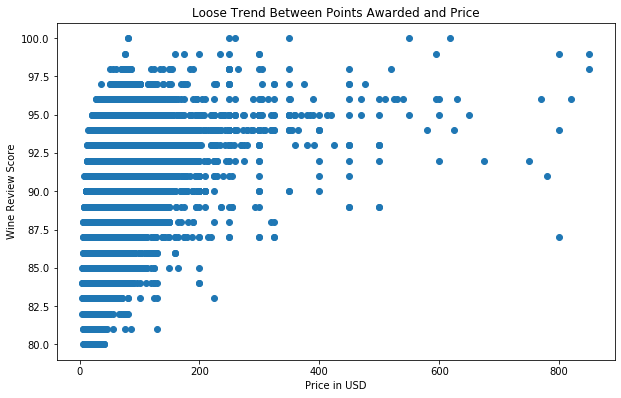

In [18]:
nona_sort = nona.sort_values(by=['price'],ascending=False)
nona_sort.head()
nona_nooutlier = nona_sort.drop(index=120391)

plt.figure(figsize=(10,6.2))
plt.scatter(nona_nooutlier['price'],nona_nooutlier['points'])
plt.title('Loose Trend Between Points Awarded and Price')
plt.xlabel('Price in USD')
plt.ylabel('Wine Review Score')
plt.show()

In [34]:
# Correlation coefficient between points and price
nona['points'].corr(nona['price'])

0.45279355494916457

In [35]:
df_grouped = nona.groupby(by=['taster_name'])
#df_countries_1000 = 
df_tasters = df_grouped.describe()
df_tasters_points = df_grouped.describe()['points']
df_tasters_points

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Alexander Peartree,258.0,85.794574,1.944875,80.0,85.00,86.0,87.00,91.0
Anna Lee C. Iijima,1710.0,87.592982,2.127135,81.0,86.00,88.0,89.00,94.0
Anne Krebiehl MW,1171.0,90.758326,2.566485,80.0,89.00,91.0,93.00,97.0
Carrie Dykes,96.0,86.718750,1.917801,82.0,85.00,87.0,88.00,92.0
Christina Pickard,2.0,91.000000,2.828427,89.0,90.00,91.0,92.00,93.0
Fiona Adams,8.0,86.875000,2.748376,82.0,85.75,87.0,88.25,91.0
Jim Gordon,2652.0,89.127074,2.665296,80.0,87.00,89.0,91.00,97.0
Joe Czerwinski,2347.0,88.902429,3.009268,80.0,87.00,89.0,91.00,100.0
Kerin O’Keefe,6903.0,89.103144,2.554890,80.0,87.00,89.0,91.00,100.0


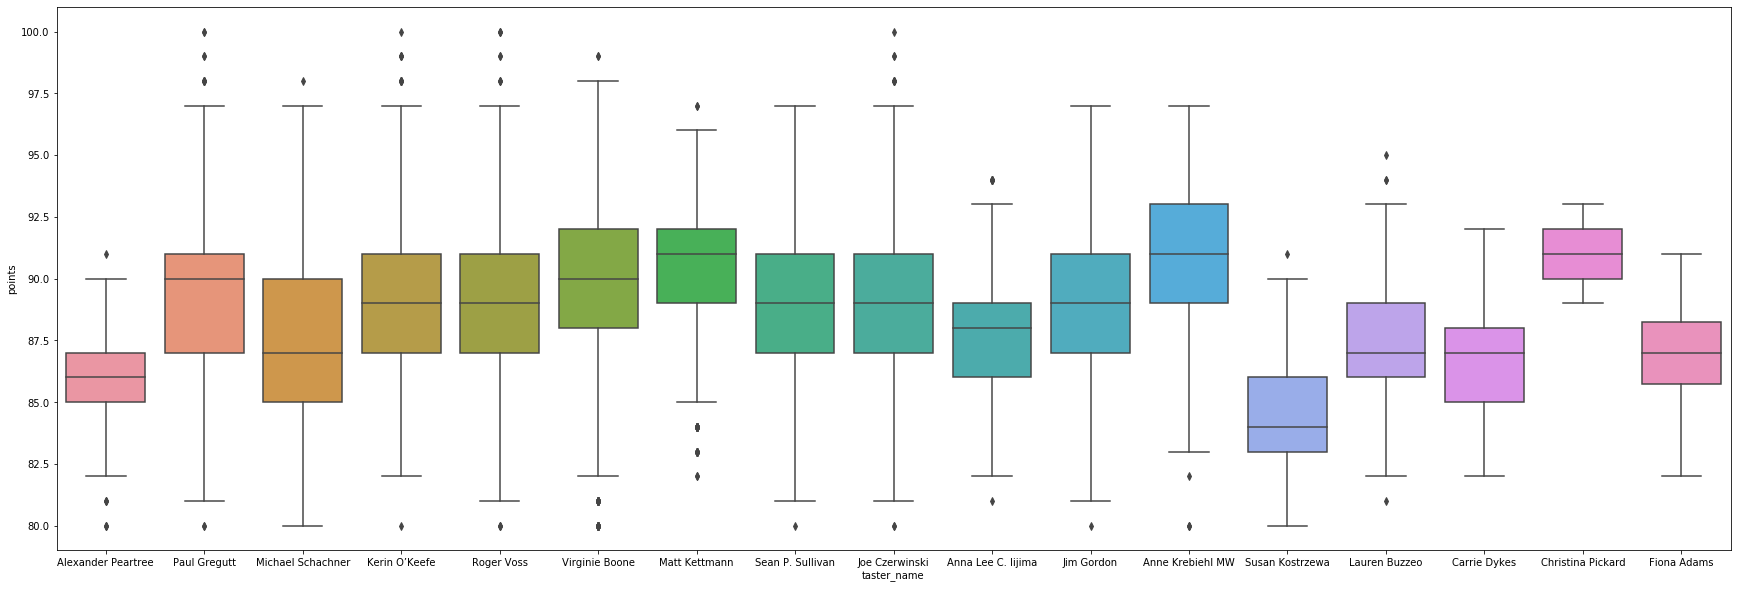

In [28]:
# sns boxplot
dims = (30, 10)

fig, ax = plt.subplots(figsize=dims)
sns.boxplot(ax=ax, x='taster_name', y='points', data=nona)
plt.show()

In [31]:
nona['points'].corr(nona['price'])

0.45279355494916457

## Reference